In [ ]:
#Kerasのutilsモジュールをインポート
#set_random_seed関数によって乱数を固定
from tensorflow.keras import utils
utils.set_random_seed(0)

#TensorFlowをインポートし、CIFAR-10のデータを取得
import tensorflow as tf
data = tf.keras.datasets.cifar10.load_data()
data

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [ ]:
#各データをそれぞれ、x_train, y_train, x_test, y_testに代入
(x_train, y_train), (x_test, y_test) = data

#shape関数を利用して、各変数に含まれるデータの構造を確認
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
#各変数を構成する数値データの最大値と最小値を確認
import numpy as np
print(np.amin(x_train), np.amax(x_train))
print(np.amin(y_train), np.amax(y_train))
print(np.amin(x_test), np.amax(x_test))
print(np.amin(y_test), np.amax(y_test))

0 255
0 9
0 255
0 9


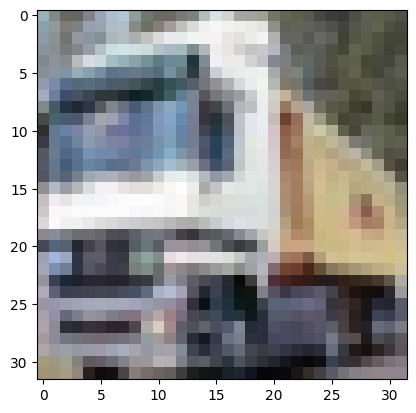

In [ ]:
#Matplotlibのpyplotモジュールのimshow関数によって、x_train[1]のデータを可視化
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [ ]:
#x_train[1]が何の画像であるかを示す答えである、y_trainの2つ目のサンプルのデータも確認
y_train[1]

array([9], dtype=uint8)

In [ ]:
#x_train, x_testのスケーリング
#画像データ（x_train, x_test）の各サンプルは、32×32×3の数値データで、各要素は、0から255の数値です。これらの数値を、0から1の範囲の値に変換
x_train = x_train / 255
x_test = x_test / 255

#y_train, y_testのOne-hotベクトル化
#One-hotベクトル化することで、10個の要素を持つ数値配列に変換し、学習データとして利用できる形にします。utilsモジュールのto_categorical関数でOne-hotベクトル化
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [ ]:
#CNNの構造を検討
#構造を定義するための主要クラスとして、Sequential, Flatten, Dense, Conv2D, MaxPooling2Dをインポート
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

#Sequentialクラスをインスタンス化
model = Sequential()

In [ ]:

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#MaxPooling2Dクラスを使って、1つ目のプーリング層を追加
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#2つ目の畳み込み層と、2つ目のプーリング層を追加
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#3つの全結合層を追加
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
#定義したCNNの可視化
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       983,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,069,822 (4.08 MB)

 Trainable params: 1,069,822 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#損失関数、最適化方法、評価指標の設定
#Sequentialクラスのcompileメソッドを使って、損失関数にカテゴリ交差エントロピー誤差を、最適化方法にAdamを、評価指標に正解率を設定
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
#学習データの1割をバリデーションデータとして利用
history = model.fit(x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.3528 - loss: 1.7635 - val_accuracy: 0.5706 - val_loss: 1.2318
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5878 - loss: 1.1567 - val_accuracy: 0.6596 - val_loss: 0.9792
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6605 - loss: 0.9680 - val_accuracy: 0.6852 - val_loss: 0.9188
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6976 - loss: 0.8597 - val_accuracy: 0.6768 - val_loss: 0.9408
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7306 - loss: 0.7675 - val_accuracy: 0.6844 - val_loss: 0.9345
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7575 - loss: 0.6890 - val_accuracy: 0.6932 - val_loss: 0.9222
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7868 - loss: 0.6194 - val_accuracy: 0.6934 - val_loss: 0.9560
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8068 - loss: 0.5610 - val_accuracy

In [ ]:
#fit関数の戻り値であるHistoryオブジェクトのhistory属性に保存された学習履歴の推移を、PandasのDataFrameに変換
import pandas as pd
df = pd.DataFrame(history.history)

<Axes: >

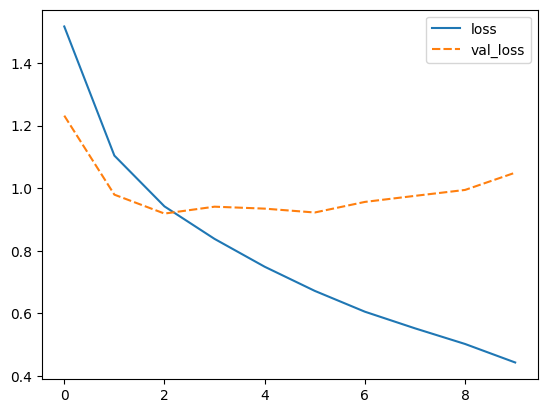

In [ ]:
#seabornのlineplotメソッドを利用して、損失関数（loss, val_loss）の推移を可視化
import seaborn as sns
sns.lineplot(data=df[['loss', 'val_loss']])

<Axes: >

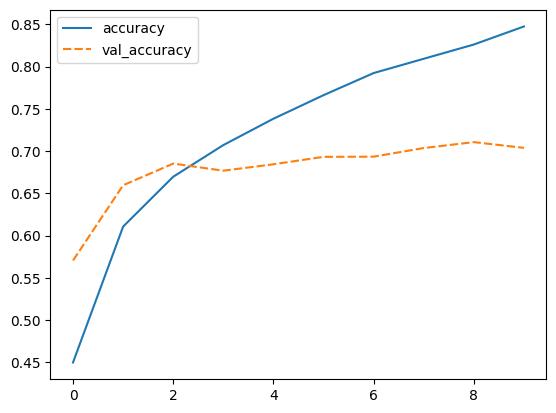

In [ ]:
#正解率（accuracy, val_accuracy）の推移も可視化
sns.lineplot(data=df[['accuracy', 'val_accuracy']])

In [ ]:
# 乱数の固定
utils.set_random_seed(0)

# モデル定義
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 誤差関数、最適化手法、評価関数の設定
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 学習
model.fit(x_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.3522 - loss: 1.7657 - val_accuracy: 0.5800 - val_loss: 1.2031
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5917 - loss: 1.1512 - val_accuracy: 0.6534 - val_loss: 0.9909
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6590 - loss: 0.9661 - val_accuracy: 0.6806 - val_loss: 0.9362
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6989 - loss: 0.8550 - val_accuracy: 0.6950 - val_loss: 0.9058
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7324 - loss: 0.7675 - val_accuracy: 0.7102 - val_loss: 0.8706


In [ ]:
#Sequentialクラスのevaluateメソッドを使って評価
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6971 - loss: 0.9015


[0.903123140335083, 0.6937000155448914]

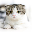

In [ ]:
#未知データの予測
#Kerasのpreprocessingモジュールのload_img関数をインポートし、画像を取り込み
from tensorflow.keras.preprocessing.image import load_img

#学習データと同じサイズである、縦32ピクセル×横32ピクセルを指定
unknown_img = load_img('/content/unknown_cifar.jpg', target_size=(32, 32))
unknown_img

In [ ]:
#preprocessingモジュールのimg_to_array関数で、array形式に変換
from tensorflow.keras.preprocessing.image import img_to_array
unknown_array = img_to_array(unknown_img)

#スケーリングを実行
unknown_array = unknown_array/255

#arrayのデータ構造を確認
unknown_array.shape

(32, 32, 3)

In [ ]:
#CNNにインプット可能なx_trainやx_testのデータ構造の確認
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
#Numpyのreshape関数を用いて変換
#unknown_arrayを、x_trainやx_testと同じデータ構造に変換
unknown_array = unknown_array.reshape((1, 32, 32, 3))

#arrayのデータ構造を確認
unknown_array.shape

(1, 32, 32, 3)

In [ ]:
#Sequentialクラスのpredictメソッドを利用してカテゴリを予測
result = model.predict(unknown_array)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


array([[0.06224192, 0.0060148 , 0.00866255, 0.53406173, 0.00198982,
        0.31957778, 0.00552144, 0.00151701, 0.0100205 , 0.05039247]],
      dtype=float32)

<Axes: >

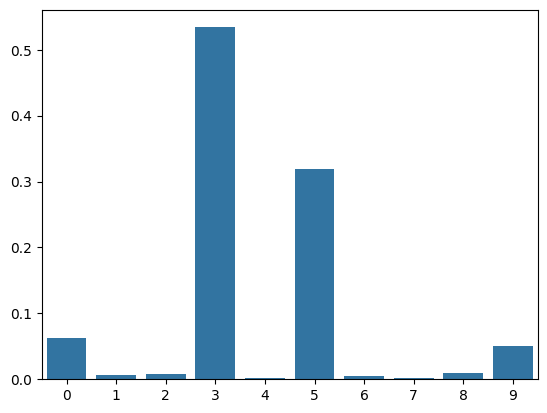

In [ ]:
#各カテゴリの確率を棒グラフで可視化
sns.barplot(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y=result[0])